In [18]:
import numpy as np
% load_ext autoreload
% autoreload 2
from matplotlib import pyplot as plt
% matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
import sys
sys.path.append('/Users/IzmailovPavel/Documents/Education/GPproject/gplib/')

In [5]:
dim = 10
num = 100
test_num= 50
x_tr = np.random.rand(num, dim)
if dim == 1:
    x_test = np.linspace(0, 1, test_num)
    x_test = x_test.reshape(test_num, 1)
else:
    x_test = np.random.rand(test_num, dim)

In [14]:
center = np.array([[.5]])
points = np.linspace(0, 1, 100)[:, None]

## Squared Exponential

In [3]:
from gplib.covfun import SE

In [4]:
cov_params = np.array([1.0, 0.15, 1e-1])
cov = SE(cov_params)

In [9]:
cov(x_tr, x_test).shape

(100, 50)

In [10]:
np.all(cov.covariance_function(x_tr, x_test) == cov(x_tr, x_test))

True

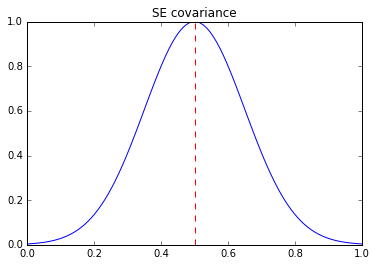

In [26]:
plt.plot(points, cov(points, center), '-b')
plt.plot([center[0, 0]]*2, [0, 1], '--r')
plt.title('SE covariance')

## Matern

In [27]:
from gplib.covfun import Matern

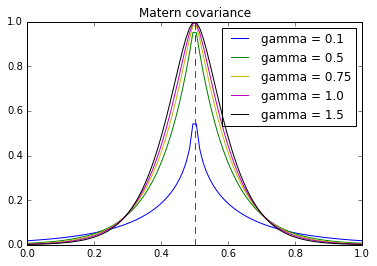

In [37]:
for gamma, color in list(zip([.1, .5, .75, 1., 1.5], ['b', 'g', 'y', 'm', 'k'])):
    cov = Matern(np.array([1.0, 0.1, gamma, 0.01]))
    plt.plot(points, cov(points, center), color, label='gamma = '+str(gamma))
    plt.plot([center[0, 0]]*2, [0, 1], '--r')
plt.legend()
plt.title('Matern covariance')

## Gamma-Exponential

In [38]:
from gplib.covfun import GammaExp

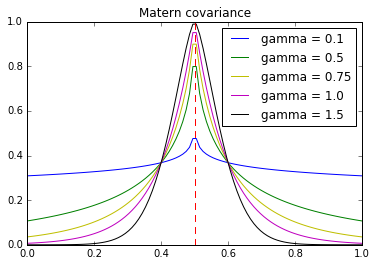

In [39]:
for gamma, color in list(zip([.1, .5, .75, 1., 1.5], ['b', 'g', 'y', 'm', 'k'])):
    cov = GammaExp(np.array([1.0, 0.1, gamma, 0.01]))
    plt.plot(points, cov(points, center), color, label='gamma = '+str(gamma))
    plt.plot([center[0, 0]]*2, [0, 1], '--r')
plt.legend()
plt.title('Matern covariance')

In [42]:
super(GammaExp)

<super: gplib.covfun.gamma_exp.GammaExp, None>